In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/kz.csv')
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


# **Problem Statement**
**Customer Purchase Prediction:**

Predict the likelihood of a customer making a purchase based on their previous purchase history and transaction attributes.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your original DataFrame
print("Initial columns:", data.columns)  # Debugging step to check column names

# Convert 'event_time' to datetime if it exists
if 'event_time' in data.columns:
    data['event_time'] = pd.to_datetime(data['event_time'])
else:
    raise KeyError("'event_time' column is not found in the DataFrame")

# Extract features from 'event_time'
data['hour'] = data['event_time'].dt.hour
data['day_of_week'] = data['event_time'].dt.dayofweek

# Aggregate data by user
user_data = data.groupby('user_id').agg({'price': 'sum', 'event_time': 'count'}).reset_index()
user_data.rename(columns={'price': 'total_spend', 'event_time': 'purchase_count'}, inplace=True)

# Merge aggregated data back to the original DataFrame
data = data.merge(user_data, on='user_id')

# Target creation based on total spend
data['target'] = (data['total_spend'] > 100).astype(int)

# Drop columns that won't be used
drop_columns = ['event_time', 'order_id', 'product_id']
# Check if these columns are in the DataFrame before dropping
existing_drop_columns = [col for col in drop_columns if col in data.columns]
data = data.drop(columns=existing_drop_columns)

# Handle missing values
data['category_code'] = data['category_code'].fillna('unknown')
data['brand'] = data['brand'].fillna('unknown')

# Encode categorical variables
categorical_features = ['category_code', 'brand']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Define the feature and target variables
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Initial columns: Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id'],
      dtype='object')


In [9]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [10]:
lor.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred = lor.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y_test

,target
18360,0
47537,1
1677,1
29632,0
8196,0
...,...
6341,0
42242,1
9868,0
47742,1


In [13]:
(y_pred == y_test).sum()*100/len(y_test)

26.255181943804697

In [14]:
(y_pred == y_test).mean()*100

26.2551819438047

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_pred, y_test)*100

26.2551819438047

In [17]:
test = X_test.copy()

In [18]:
test['y_test'] = y_test
test['y_pred'] = y_pred
test.head()

,category_id,price,user_id,hour,day_of_week,total_spend,purchase_count,category_code_accessories.umbrella,category_code_apparel.costume,category_code_apparel.glove,...,brand_zemex,brand_zeppelin,brand_zeta,brand_zhiyun,brand_zlatek,brand_zowie,brand_zugo,brand_zwilling,y_test,y_pred
18360,2.268105e+18,13.87,1.515916e+18,19,5,13.87,1,False,False,False,...,False,False,False,False,False,False,False,False,0,0
47537,2.268105e+18,14.56,1.515916e+18,12,6,24671.81,192,False,False,False,...,False,False,False,False,False,False,False,False,1,0
1677,2.268105e+18,138.63,1.515916e+18,20,3,151.11,2,False,False,False,...,False,False,False,False,False,False,False,False,1,0
29632,2.268105e+18,16.18,1.515916e+18,16,6,16.18,1,False,False,False,...,False,False,False,False,False,False,False,False,0,0
8196,2.268105e+18,60.16,1.515916e+18,13,5,60.16,1,False,False,False,...,False,False,False,False,False,False,False,False,0,0


In [19]:
X_test.head()

,category_id,price,user_id,hour,day_of_week,total_spend,purchase_count,category_code_accessories.umbrella,category_code_apparel.costume,category_code_apparel.glove,...,brand_yoobao,brand_zala,brand_zemex,brand_zeppelin,brand_zeta,brand_zhiyun,brand_zlatek,brand_zowie,brand_zugo,brand_zwilling
18360,2.268105e+18,13.87,1.515916e+18,19,5,13.87,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47537,2.268105e+18,14.56,1.515916e+18,12,6,24671.81,192,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1677,2.268105e+18,138.63,1.515916e+18,20,3,151.11,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29632,2.268105e+18,16.18,1.515916e+18,16,6,16.18,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8196,2.268105e+18,60.16,1.515916e+18,13,5,60.16,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
row = X_test.head(1)
row

,category_id,price,user_id,hour,day_of_week,total_spend,purchase_count,category_code_accessories.umbrella,category_code_apparel.costume,category_code_apparel.glove,...,brand_yoobao,brand_zala,brand_zemex,brand_zeppelin,brand_zeta,brand_zhiyun,brand_zlatek,brand_zowie,brand_zugo,brand_zwilling
18360,2.268105e+18,13.87,1.515916e+18,19,5,13.87,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
lor.predict_proba(row)
#P(Y=0 | X) , P(Y=1 | X)

array([[0.5, 0.5]])

In [22]:
lor.predict_proba(row)

array([[0.5, 0.5]])

In [23]:
lor.predict(row)

array([0])

In [24]:
lor.coef_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [25]:
X_test.head()

,category_id,price,user_id,hour,day_of_week,total_spend,purchase_count,category_code_accessories.umbrella,category_code_apparel.costume,category_code_apparel.glove,...,brand_yoobao,brand_zala,brand_zemex,brand_zeppelin,brand_zeta,brand_zhiyun,brand_zlatek,brand_zowie,brand_zugo,brand_zwilling
18360,2.268105e+18,13.87,1.515916e+18,19,5,13.87,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47537,2.268105e+18,14.56,1.515916e+18,12,6,24671.81,192,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1677,2.268105e+18,138.63,1.515916e+18,20,3,151.11,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29632,2.268105e+18,16.18,1.515916e+18,16,6,16.18,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8196,2.268105e+18,60.16,1.515916e+18,13,5,60.16,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
test.head()

,category_id,price,user_id,hour,day_of_week,total_spend,purchase_count,category_code_accessories.umbrella,category_code_apparel.costume,category_code_apparel.glove,...,brand_zemex,brand_zeppelin,brand_zeta,brand_zhiyun,brand_zlatek,brand_zowie,brand_zugo,brand_zwilling,y_test,y_pred
18360,2.268105e+18,13.87,1.515916e+18,19,5,13.87,1,False,False,False,...,False,False,False,False,False,False,False,False,0,0
47537,2.268105e+18,14.56,1.515916e+18,12,6,24671.81,192,False,False,False,...,False,False,False,False,False,False,False,False,1,0
1677,2.268105e+18,138.63,1.515916e+18,20,3,151.11,2,False,False,False,...,False,False,False,False,False,False,False,False,1,0
29632,2.268105e+18,16.18,1.515916e+18,16,6,16.18,1,False,False,False,...,False,False,False,False,False,False,False,False,0,0
8196,2.268105e+18,60.16,1.515916e+18,13,5,60.16,1,False,False,False,...,False,False,False,False,False,False,False,False,0,0


In [27]:
idx = test.index
idx

Index([18360, 47537,  1677, 29632,  8196, 38052, 11089, 32728, 14789, 27529,
       ...
       45753, 43816, 24912,  6436,   109,  6341, 42242,  9868, 47742, 48153],
      dtype='int64', length=15197)

In [28]:
test.shape

(15197, 718)

In [29]:
lor.predict_proba(X_test.head(2))

array([[0.5, 0.5],
       [0.5, 0.5]])

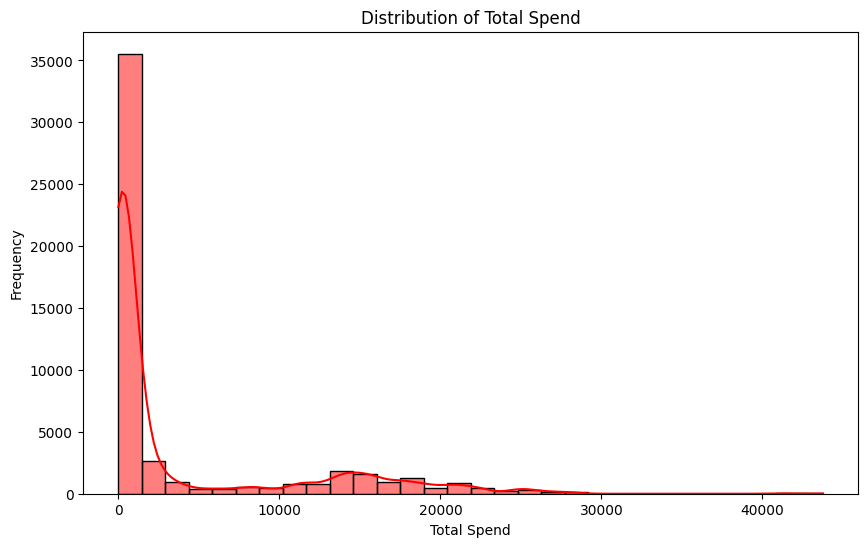

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_spend'], bins=30, kde=True, color = 'r')
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

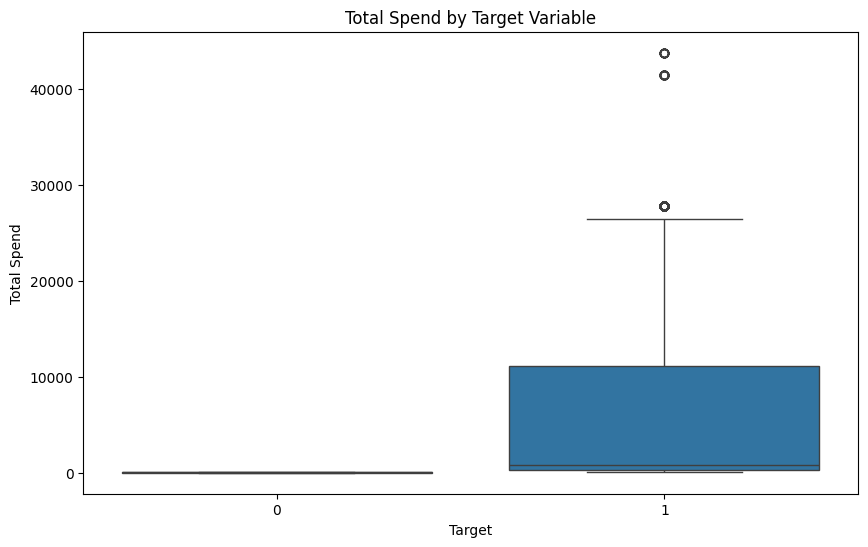

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='total_spend', data=data)
plt.title('Total Spend by Target Variable')
plt.xlabel('Target')
plt.ylabel('Total Spend')
plt.show()


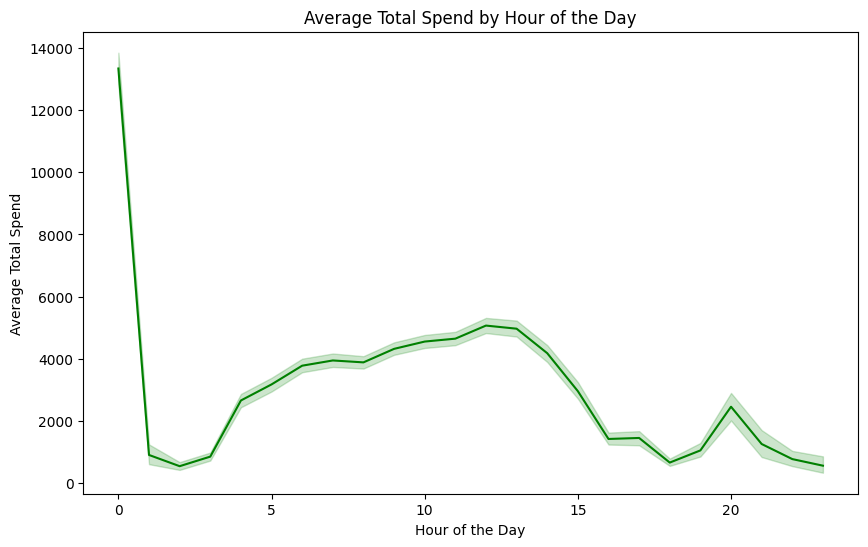

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='total_spend', data=data, estimator='mean', color = 'g')
plt.title('Average Total Spend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Spend')
plt.show()


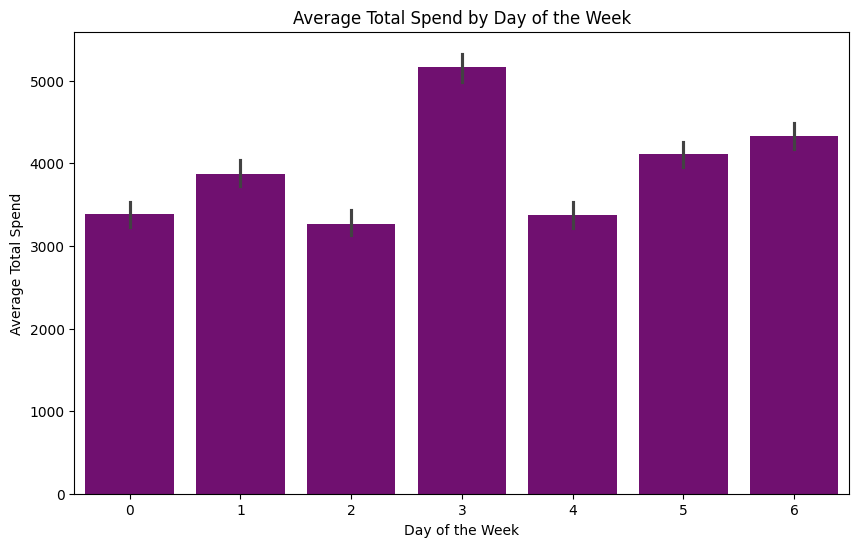

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total_spend', data=data, estimator='mean', color = 'purple')
plt.title('Average Total Spend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Spend')
plt.show()


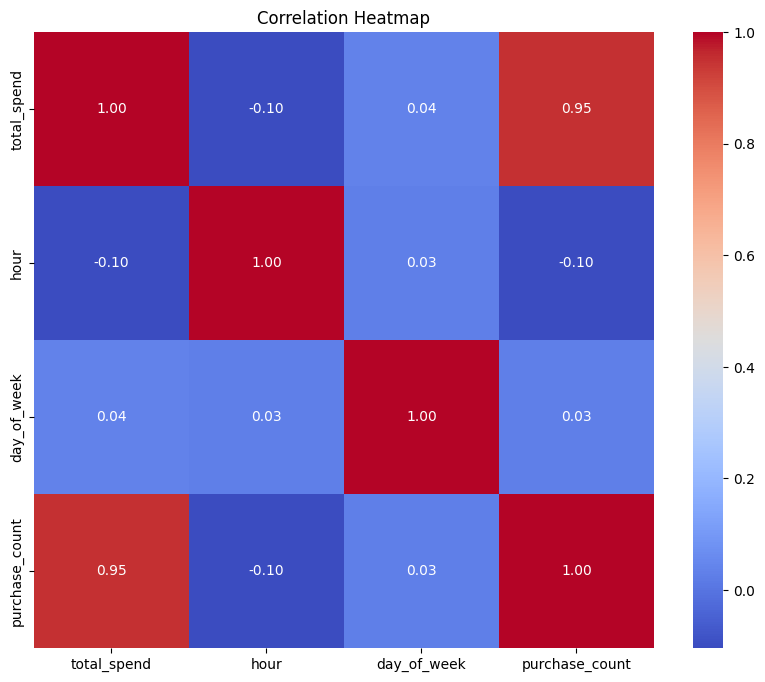

In [38]:
plt.figure(figsize=(10, 8))
corr_matrix = data[['total_spend', 'hour', 'day_of_week', 'purchase_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Accuracy: 1.0


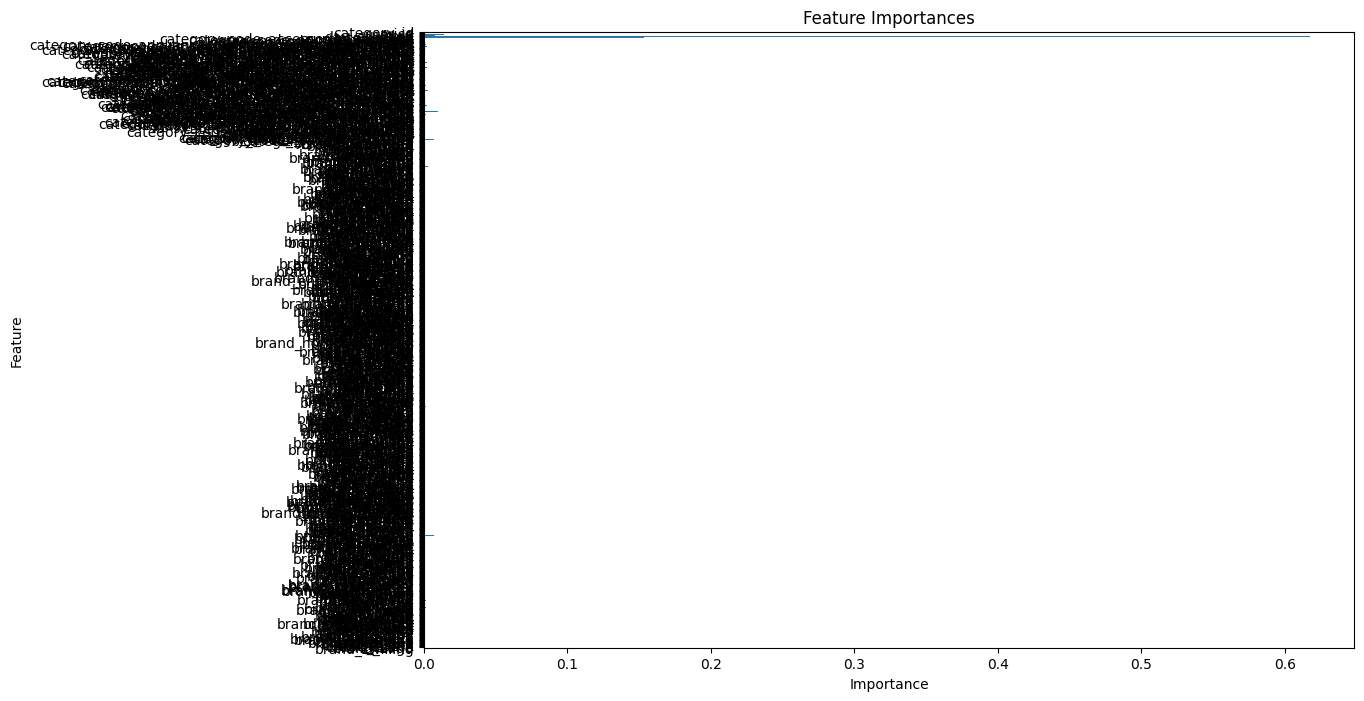

In [45]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Feature Importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

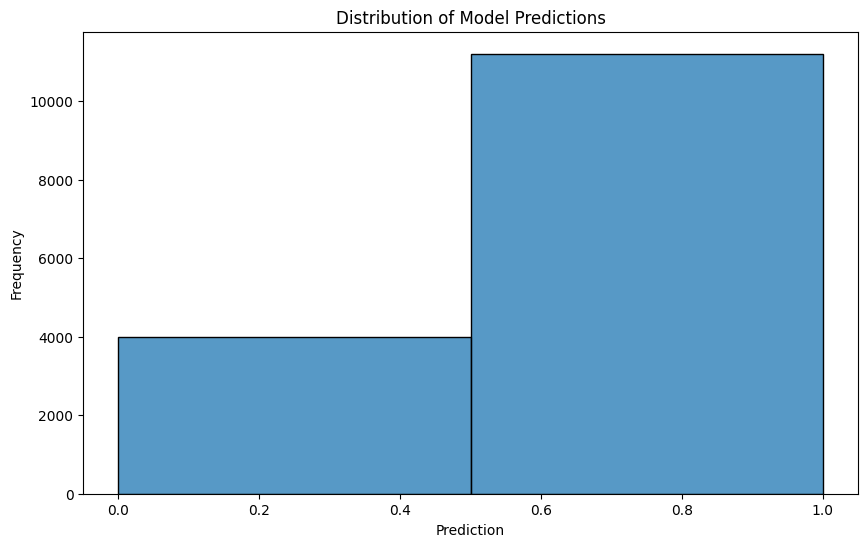

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=2, kde=False)
plt.title('Distribution of Model Predictions')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()


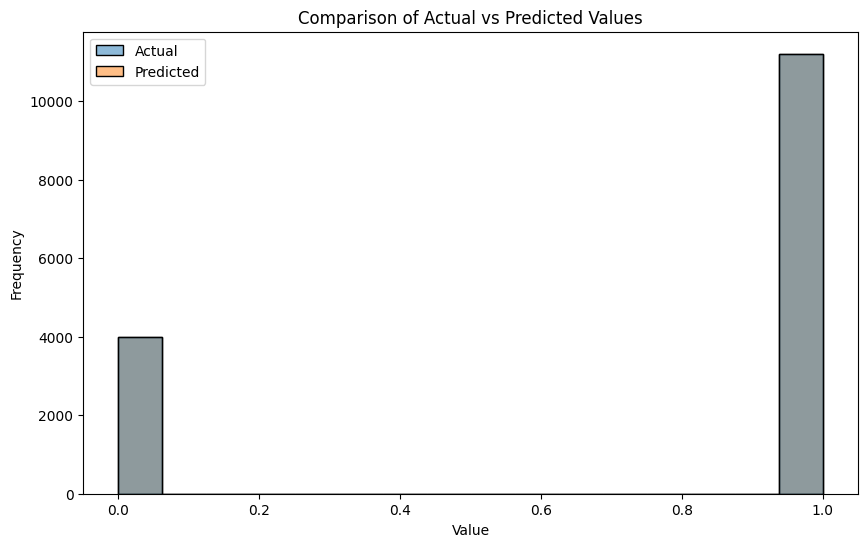

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data={'Actual': y_test, 'Predicted': y_pred}, kde=False)
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


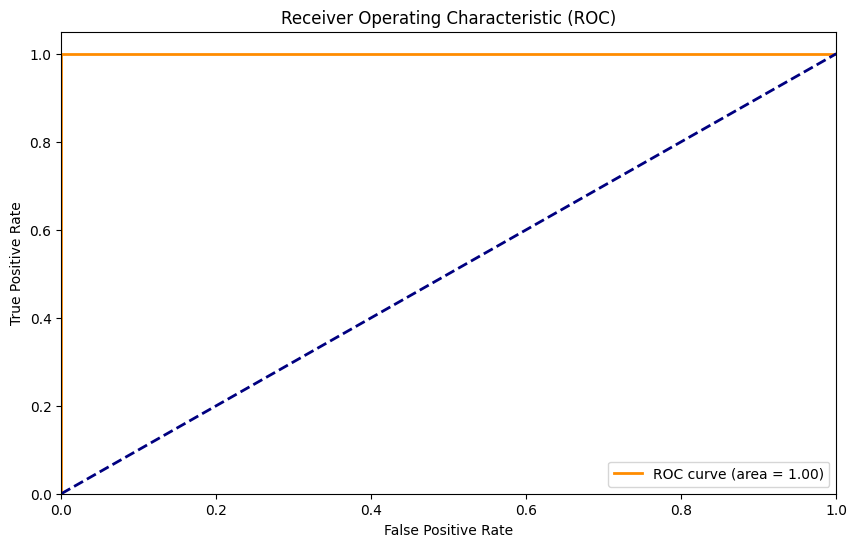

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


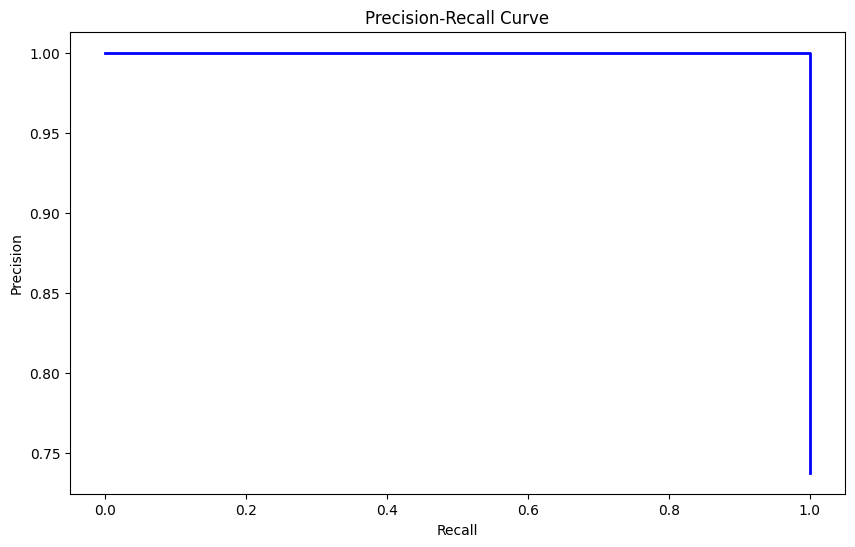

In [49]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
